In [8]:
# setwd("C:/Users/ruteee/Documents/Sistemas Probabilisticos")//
library(lubridate)
library(corrplot)
sectorData <- read.csv(file="sector_variation.csv", header=TRUE, sep=",")
order.data <- order(sectorData$setor)
sectorOrdenado <- sectorData[order.data,]

,Basic.Industries,Capital.Goods,Consumer.Durables,Consumer.Non.Durables,Consumer.Services,Energy,Finance,Health.Care,Miscellaneous,Public.Utilities,Technology,Transportation
Basic Industries,1.00,0.90,0.86,0.82,0.82,0.83,0.76,0.57,0.76,0.20,0.82,0.78
Capital Goods,0.90,1.00,0.94,0.88,0.90,0.75,0.83,0.67,0.85,0.21,0.90,0.83
Consumer Durables,0.86,0.94,1.00,0.90,0.91,0.70,0.83,0.66,0.82,0.21,0.88,0.82
Consumer Non-Durables,0.82,0.88,0.90,1.00,0.91,0.67,0.79,0.64,0.82,0.22,0.85,0.78
Consumer Services,0.82,0.90,0.91,0.91,1.00,0.68,0.82,0.68,0.85,0.21,0.87,0.80
Energy,0.83,0.75,0.70,0.67,0.68,1.00,0.64,0.46,0.65,0.21,0.68,0.68
Finance,0.76,0.83,0.83,0.79,0.82,0.64,1.00,0.58,0.72,0.19,0.77,0.74
Health Care,0.57,0.67,0.66,0.64,0.68,0.46,0.58,1.00,0.70,0.15,0.74,0.58
Miscellaneous,0.76,0.85,0.82,0.82,0.85,0.65,0.72,0.70,1.00,0.18,0.92,0.72
Public Utilities,0.20,0.21,0.21,0.22,0.21,0.21,0.19,0.15,0.18,1.00,0.20,0.19


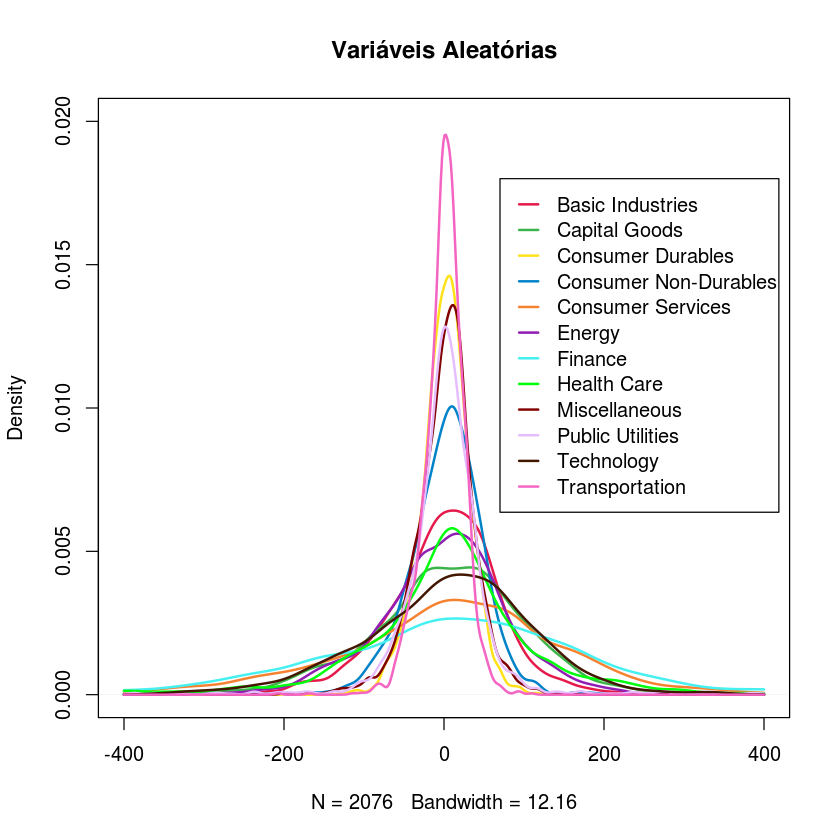

In [9]:
setores <-unique(sectorOrdenado$setor)
listaFramesPorSetor <- list()
listaAmostrasPorSetor <- list() 
listaCorrelacoesPorSetor <- list()

for (i in 1:12){
    filtro <- sectorOrdenado$setor == setores[i]    
    listaFramesPorSetor[[i]] <- sectorOrdenado[filtro,]
    listaAmostrasPorSetor[[i]] <- sectorOrdenado[filtro,]$variacao
}

correlacoesPorSetor <- vector(mode='double', length=12)
for(j in 1:12){
    x <- unlist(listaAmostrasPorSetor[j])
    for(k in 1:12){
        y <- unlist(listaAmostrasPorSetor[k])
        correlacoesPorSetor[k] <- cor(x,y)
    }
    listaCorrelacoesPorSetor[[j]] <- round(correlacoesPorSetor, 2)
    #print(mean(unlist(listaCorrelacoesPorSetor[[j]])))
    correlacoesPorSetor <- round(replace(correlacoesPorSetor, seq(1:12), 0),2)
    
}

densidadeSetor1 <- density(unlist(listaFramesPorSetor[[1]][3]), from = -400, to = 400)
#print(mean(unlist(listaFramesPorSetor[[1]][3])))
cores <- c("#e6194b", "#3cb44b","#ffe119", "#0082c8", "#f58231", "#911eb4",
          "#46f0f0", "#00FF0C",  "#800000", "#e6beff", "#421601", "#f464C2")

plot(densidadeSetor1, col=cores[1],  ylim = c(0, 0.020), main="Variáveis Aleatórias", lwd=2)
for(l in 2:12){
    #print(mean(unlist(listaFramesPorSetor[[l]][3])))
   lines(density(unlist(listaFramesPorSetor[[l]][3]), from= -400, to=400), ylim= c(0, 0.02), col=cores[l], lwd = 2)
}



legend(70, 0.018,
       setores,
       lty = 1,
       lwd = 2,
       col = cores,
       angle = 45,
       seg.len=1,
       text.width = 265)

dataFrameCorrelacoes = as.data.frame(listaCorrelacoesPorSetor, col.names = setores, row.names=setores)
#write.csv(dataFrameCorrelacoes, "C:/Users/ruteee/Documents/git/influx/MatrizCorrelacao.csv")
dataFrameCorrelacoes

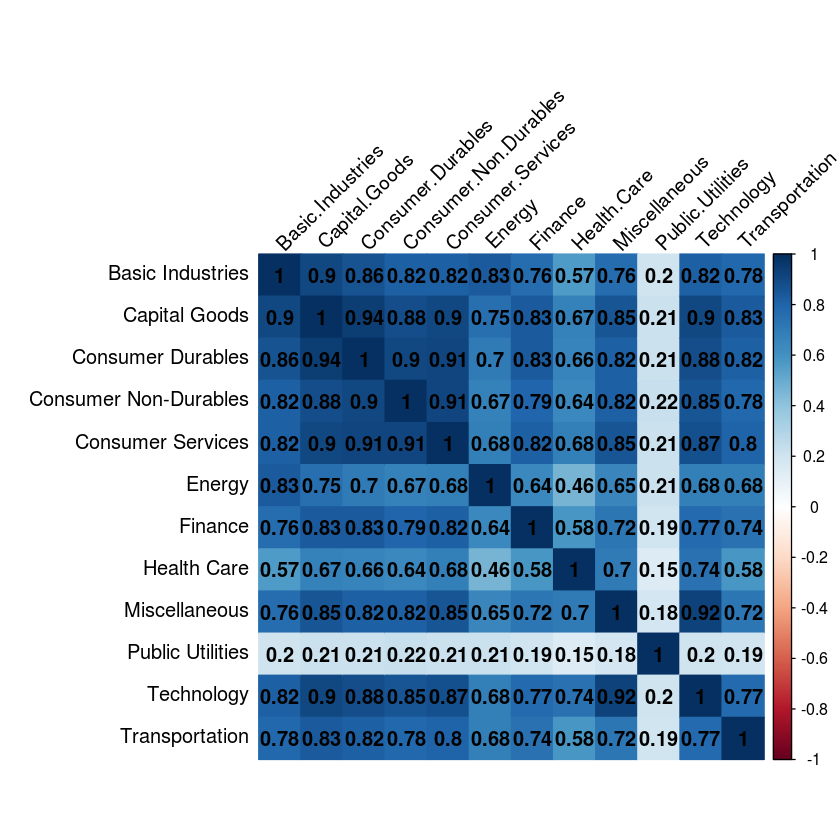

In [28]:
corrplot(as.matrix(dataFrameCorrelacoes),
         method = "color",
         type = "full",
         addCoef.col = TRUE,
         tl.srt=45,
         tl.col = "black",
         pch.col = "red"
        )
? corrplot